In [8]:
import pandas as pd

In [9]:
df=pd.read_csv('C:/data_science/gridcomputing/Modified_dataset_20001.csv')

In [10]:
df.head(10)
EPSILON = 1e-10

In [11]:
df.shape

(20001, 18)

In [12]:
def smape(actual: np.ndarray, predicted: np.ndarray):
    """
    Symmetric Mean Absolute Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.mean(2.0 * np.abs(actual - predicted) / ((np.abs(actual) + np.abs(predicted)) + EPSILON))

In [13]:
waittime=df['WaitTime']
waittime

0         203761
1              0
2            117
3           4406
4         202516
5              1
6        2629516
7              1
8              2
9              2
10             1
11        197623
12       2627085
13            58
14           975
15            58
16        196002
17            58
18            58
19            58
20            58
21           117
22        194983
23            58
24       2499978
25       2499722
26       2491849
27       2474476
28       2466405
29         27481
          ...   
19971          1
19972          1
19973          3
19974          1
19975          2
19976          2
19977          1
19978          1
19979          1
19980          2
19981          1
19982          2
19983          1
19984          2
19985          1
19986          2
19987          1
19988          2
19989          1
19990          1
19991          1
19992          1
19993          2
19994          1
19995          1
19996          3
19997          1
19998         

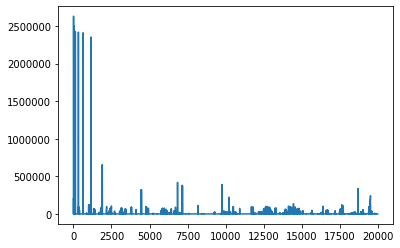

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(waittime)
plt.show()

C:\Users\anton\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


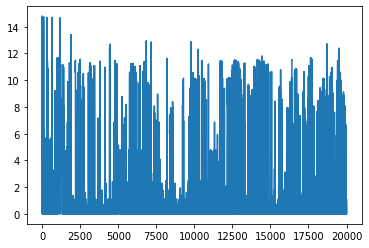

In [15]:
import numpy as np
plt.plot(np.log(waittime))
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2,random_state = 0)

In [17]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(train['WaitTime'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -27.791040
p-value: 0.000000


In [18]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(train['WaitTime'], order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\anton\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\anton\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:             D.WaitTime   No. Observations:                15999
Model:                 ARIMA(1, 1, 2)   Log Likelihood             -200518.310
Method:                       css-mle   S.D. of innovations          67100.117
Date:                Sat, 04 Apr 2020   AIC                         401046.620
Time:                        21:48:49   BIC                         401085.022
Sample:                             1   HQIC                        401059.321
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0620      0.115     -0.538      0.591      -0.288       0.164
ar.L1.D.WaitTime    -0.9531      0.016    -59.564      0.000      -0.984      -0.922
ma.L1.D.WaitTime    -0.0429 

In [25]:
# 1,1,1 ARIMA Model
model = ARIMA(train.drop('WaitTime',axis=1), order=(16000,15,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

ValueError: d > 2 is not supported

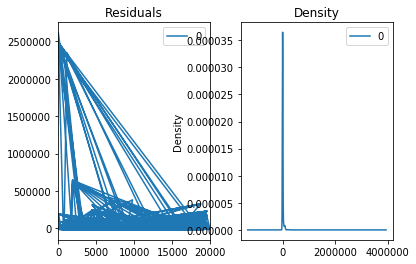

In [26]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

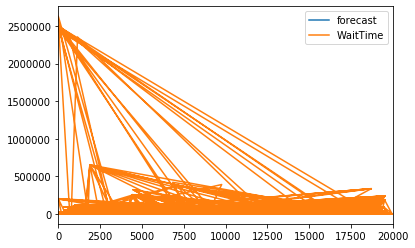

In [20]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=True)
plt.show()

SyntaxError: invalid syntax (<ipython-input-21-deb3ac81b604>, line 1)